# ¡Hola Julieta!

Mi nombre es Sofia Arboleda, estaré ayudándote a revisar este proyecto para que quede en su mejor versión.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. Esto es útil para que te acostumbres a un escenario laboral. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo funciona esta revisión? Leeré atentamente tu código y te señalaré tus fortalezas y aquellas cosas que podemos mejorar. Los comentarios aparecerán de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si todo está perfecto y no se requieren cambios en el código.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberás hacer las correcciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si definitivamente hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma si algo no queda claro (copia este código en una celda markdown):

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.        
</div>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


### Comentario General Iteración #1
<div class="alert alert-block alert-warning">

Julieta, quería dejarte aquí una apreciación general de tu proyecto para que a partir de allí nos vayamos punto por punto. 

Primero que nada, espero qu este camino en el mundo de los datos esté siendo muy interesante y lleno de aprendizajes significativos. Espero que lo disfrutes y puedas hacerte muchas preguntas que te lleven a analizar y ver los datos como si fueran historias, porque al final, ese es nuestro objetivo!

Respecto a tu trabajo en esta primera iteración, has mostrado tus conocimientos de la mejor forma, utilizando los metodos correctamente, realizando filtros de forma sencilla y trabajando con los diferentes datasets para llegar a las respuestas de negocio que se buscaban en este proyecto. Solo hubo un mal tratamiento de los datos de las edades de los usuarios y esto se propagó a lo largo del analisis. Revisa esta parte y espero tu proxima entrega, saludos!
</div>

--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [445]:


#import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [446]:

plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')


In [447]:
import numpy as np


In [448]:
# Asegurar que age sea numérica (lo que no se pueda convertir -> NaN)
users['age'] = pd.to_numeric(users['age'], errors='coerce')


In [449]:
# Marcar edades fuera de rango como inválidas
users.loc[(users['age'] < 18) | (users['age'] > 100), 'age'] = np.nan


In [450]:
# mostrar las primeras 5 filas de plans 
plans.head()


,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [451]:
users['age'].describe()

count    3945.000000
mean       48.137896
std        17.812830
min        18.000000
25%        33.000000
50%        48.000000
75%        64.000000
max        79.000000
Name: age, dtype: float64

In [452]:
# mostrar las primeras 5 filas de users
users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53.0,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [453]:
# mostrar las primeras 5 filas de usage
usage.head()


,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [454]:
# revisar el número de filas y columnas de cada dataset
print("plans:", plans.shape)
print("users:", users.shape)
print("usage:", usage.shape)


plans: (2, 8)
users: (4000, 8)
usage: (40000, 6)


In [455]:
# inspección de plans con .info()
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [456]:
# inspección de users con .info()
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     4000 non-null   int64  
 1   first_name  4000 non-null   object 
 2   last_name   4000 non-null   object 
 3   age         3945 non-null   float64
 4   city        3531 non-null   object 
 5   reg_date    4000 non-null   object 
 6   plan        4000 non-null   object 
 7   churn_date  466 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 250.1+ KB


In [457]:
# inspección de usage con .info()
usage.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Buen trabajo con la importación de las librerías y datasets requeridos, al igual que con los métodos para la exploración inicial de los datos.

---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [458]:
# cantidad de valores nulos en users
print(users.isna().sum())

# proporción de valores nulos en users
print(users.isna().mean())


user_id          0
first_name       0
last_name        0
age             55
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.01375
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [459]:
# cantidad de nulos para usage
# cantidad de valores nulos en usage
print(usage.isna().sum())

# proporción de valores nulos en usage
print(usage.isna().mean())


id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**:
**Valores inválidos o sentinels**

- En el dataset **users**, la columna **age** presenta algunos valores que parecen estar fuera de un rango lógico.  
  **Acción:** Revisar y definir rangos válidos durante la etapa de limpieza.

- Las columnas categóricas **city** y **plan** en **users** muestran valores consistentes.  
  **Acción:** No se requiere acción en esta etapa.

- En el dataset **usage**, la columna **type** contiene únicamente los valores esperados.  
  **Acción:** No se detectan valores inválidos.

- Las columnas numéricas de **usage** muestran valores extremos.  
  **Acción:** Evaluar estos valores más adelante como posibles outliers.


💡 esto: **Nota:** 

Las decisiones sobre el tratamiento de valores nulos se basan en la proporción observada en cada columna.  
Si una columna presenta más del 80–90% de valores nulos, se considera ignorarla o eliminarla, ya que aporta poca información útil.  
Cuando la proporción de valores nulos se encuentra entre 5% y 30%, se recomienda investigar el origen de los faltantes para decidir si es posible imputarlos o dejarlos como NA.  
Si la proporción de valores nulos es menor al 5%, generalmente se trata como un caso simple, donde se puede imputar o dejar como NA sin afectar significativamente el análisis.

 
 ---

**Valores nulos**  

- En el dataset **users**, algunas columnas presentan valores faltantes en una proporción baja a moderada.  
  **Acción:** Investigar cada columna y, según su importancia, imputar valores razonables o dejar los nulos si no afectan el análisis.

- En el dataset **usage**, la proporción de valores faltantes es mínima o inexistente.  
  **Acción:** Ignorar los valores nulos y conservar los registros.

- El dataset **plans** no presenta valores faltantes.  
  **Acción:** No se requiere ninguna intervención.


### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [460]:
# explorar columnas numéricas de users

- La columna `user_id` ... Haz doble clic en este bloque y escribe qué ves.
- La columna `age` ...

In [461]:
# explorar columnas numéricas de usage
usage.describe()


,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000



Las columnas numéricas de **usage** representan el uso del servicio por parte de los usuarios.  
Se observan valores extremos que podrían indicar comportamientos atípicos o outliers.  
**Acción:** Evaluar estos valores en etapas posteriores del análisis.



In [462]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
columnas_user = ['city', 'plan']
users[columnas_user].nunique()



city    7
plan    2
dtype: int64

- La columna `city` ...
- La columna `plan` ...

In [463]:
users['city'].value_counts().head()


Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
Name: city, dtype: int64

In [464]:
users['plan'].value_counts()


Basico     2595
Premium    1405
Name: plan, dtype: int64

In [465]:
# explorar columna categórica de usage
usage['type'] # completa el código
usage['type'].value_counts()


text    22092
call    17908
Name: type, dtype: int64

- La columna `type` ...
La columna type indica el tipo de uso del servicio.  
Los valores observados corresponden a las categorías esperadas.  
Acción: No se detectan valores inválidos o sentinels.


---
✍️ **Comentario**:
Revisión y estandarización de fechas**

Las columnas de fecha fueron convertidas correctamente al tipo fecha utilizando un manejo a prueba de errores.  
Al revisar los años presentes en reg_date y date, se observan únicamente años dentro del periodo esperado, sin registros futuros ni años imposibles.

Mantener los registros con fechas válidas y considerar excluir aquellos valores que no pudieron convertirse correctamente si afectan el análisis posterior.


**Valores inválidos o sentinels**  
Se identifican posibles valores inválidos en la columna Age del dataset Users, ya que algunos registros parecen estar fuera de un rango lógico.  
En el dataset Usage, no se observan valores categóricos inválidos en la columna Type, y las columnas identificadoras (id, user_id) no presentan sentinels al ser solo identificadores.

**Acción:** Revisar y definir rangos válidos para age durante la limpieza y evaluar valores extremos en variables numéricas de uso como posibles outliers. No se requiere acción para las columnas categóricas ni identificadores.


### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [466]:

# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')



In [467]:


# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')


In [468]:
# Ver filas con año 2026 en reg_date
users[users['reg_date'].dt.year == 2026][['reg_date']].head(10)


,reg_date
40,2026-05-10
56,2026-05-10
60,2026-05-10
70,2026-05-10
248,2026-05-10
320,2026-05-10
326,2026-05-10
505,2026-05-10
527,2026-05-10
646,2026-05-10


In [469]:

# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts().sort_index()




2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

In [470]:
(users['reg_date'].dt.year == 2026).sum()


40

Se identificaron registros con fechas en el año 2026, considerado un año futuro respecto al alcance del análisis (datos hasta 2024). Estas fechas se trataron como inválidas y se convirtieron a NaT para evitar sesgos en el análisis temporal.


In [471]:


# Marcar fechas futuras como inválidas (datos solo hasta 2024)
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT





In [472]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts().sort_index()


2024.0    39950
Name: date, dtype: int64

✍️ **Comentario**: 
Comentario

Las columnas de fecha fueron convertidas correctamente al tipo fecha utilizando un manejo a prueba de errores.
Al revisar los años presentes en los datos, se identificaron algunos registros con fechas futuras (año 2026), las cuales se consideraron errores de captura, dado que el alcance del análisis contempla datos hasta el año 2024.

Acción

Las fechas fuera de rango fueron tratadas como valores inválidos y convertidas a NaT para evitar su uso en el análisis.
Los registros con fechas válidas se mantuvieron, dejando el dataset listo para el análisis temporal posterior.


**Fechas fuera de rango**  

Se identificaron registros con fechas futuras (año 2026), consideradas errores de captura, ya que el alcance del análisis contempla datos hasta 2024.
Acción: Las fechas fuera de rango fueron tratadas como valores inválidos y convertidas en NaT para evitar su uso en el análisis.


<div class="alert alert-block alert-warning">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Reconociste los valores nulos y atipicos en las columnas de los datasets. Hiciste un correcto cambio de formato a tipo fecha para las columnas y reconociste los años anomalos (que no serán necesarios para el analisis). Solo ten cuidado con el dataset `users`, ya que allí hay un año anomalo: 2026, ya que es el futuro, en nuestro analisis este año aun no ha llegado. 

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [473]:
# Reemplazar -999 por la mediana de age
age_mediana = ...
users['age'] = ...

# Verificar cambios
users['age'].describe()

count         4000
unique           1
top       Ellipsis
freq          4000
Name: age, dtype: object

In [474]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)


# Verificar cambios
users['city'].isna().sum()

565

In [475]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT
usage.loc[usage['date'].dt.year > 2024, 'date'] = pd.NaT

# Verificar cambios
users['reg_date'].dt.year.value_counts(dropna=False).sort_index()
usage['date'].dt.year.value_counts(dropna=False).sort_index()

2024.0    39950
NaN          50
Name: date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [476]:

# Verificación MAR en usage (Missing At Random) para duration

usage['is_text'] = (usage['type'] == "text").astype(int)
usage['is_call'] = (usage['type'] == "call").astype(int)



In [477]:
# Agrupar información por usuario
usage_agg = (usage
    .groupby('user_id')
    .agg(
        total_texts=('is_text', 'sum'),
        total_calls=('is_call', 'sum'),
        total_duration=('duration', 'sum')
    )
    .reset_index()
)

# observar resultado
usage_agg.head(3)


,user_id,total_texts,total_calls,total_duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [478]:
# Verificación MAR en usage (Missing At Random) para length
usage['length'].isna().groupby(usage['type']).mean()



type
call    0.99933
text    0.00000
Name: length, dtype: float64

**Diagnóstico de nulos en length**

La proporción de valores nulos en length depende del tipo de registro indicado en la columna type.

Se observa que los valores nulos se concentran casi exclusivamente en los registros correspondientes a llamadas (call), mientras que los mensajes de texto (text) presentan valores completos.

Este comportamiento es consistente con la naturaleza de los datos, ya que las llamadas no tienen longitud de texto, mientras que los mensajes sí la tienen.

Acción: Mantener los valores nulos sin imputar, ya que representan correctamente la ausencia de información y no afectan negativamente el análisis.


<div class="alert alert-block alert-danger">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Buen trabajo con los reemplazos de los valores atípicos de `city` del datset `users`. Sin embargo, no realizaste este proceso para la columna `age` y esto daña los datos numericos que ella contiene. 

Igualmente la verificación de los MAR está correcta, como mencionas, tiene sentido que las proporciones varien segun el tipo ya que las llamadas no tienen un `lenght` y los mensajes no tienen `duration`. 

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [479]:






usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas








# Agrupar información por usuario

usage_agg = (
    usage
    .groupby('user_id')
    .agg(
        cant_mensajes=('is_text', 'sum'),
        cant_llamadas=('is_call', 'sum'),
        cant_minutos_llamada=('duration', 'sum')
    )
    .reset_index()
)


# Ver resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [480]:
# Renombrar columnas

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [481]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(
    usage_agg,
    on='user_id',
    how='left'
)

user_profile.head(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,Ellipsis,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,Ellipsis,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,Ellipsis,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,Ellipsis,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,Ellipsis,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [482]:
# Resumen estadístico de las columnas numéricas
user_profile[
    ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
].describe()


,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


In [483]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True) * 100


Basico     64.875
Premium    35.125
Name: plan, dtype: float64

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Genial! La creación de la tabla auxiliar con el conteo de llamadas y mensajes por usuario está super bien, muy buen uso del filtrado, el agrupamiento con `groupby` y el `merge`. 

El resumen estadístico también está super bien.

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

In [484]:

import matplotlib.pyplot as plt


In [485]:
user_profile['age'].dtype


dtype('O')

In [486]:
user_profile['age'].head(10)


0    Ellipsis
1    Ellipsis
2    Ellipsis
3    Ellipsis
4    Ellipsis
5    Ellipsis
6    Ellipsis
7    Ellipsis
8    Ellipsis
9    Ellipsis
Name: age, dtype: object

In [487]:
user_profile['age'].unique()[:20]


array([Ellipsis], dtype=object)

In [488]:
user_profile['age'] = pd.to_numeric(user_profile['age'], errors='coerce')


In [489]:
# Asegurar que age sea numérica (elimina '...' y texto raro)
users['age'] = pd.to_numeric(users['age'], errors='coerce')

# Marcar edades fuera de rango como inválidas
users.loc[(users['age'] < 18) | (users['age'] > 100), 'age'] = np.nan


In [490]:
user_profile['plan'].value_counts(dropna=False)


Basico     2595
Premium    1405
Name: plan, dtype: int64

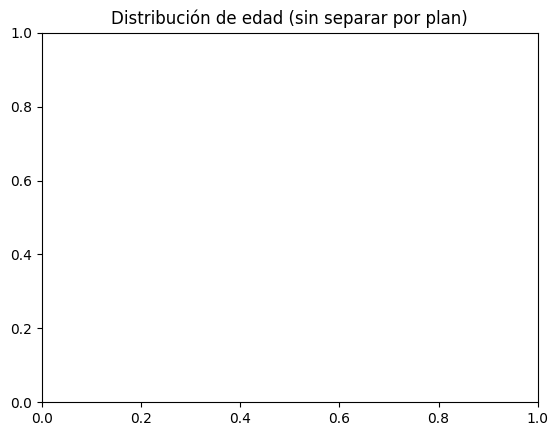

In [491]:
#histplot
sns.histplot(
    data=users.dropna(subset=['age']),
    x='age',
    bins=20,
    color='skyblue'
)
plt.title('Distribución de edad (sin separar por plan)')
plt.show()


In [492]:
users['age'].notna().sum()


0

In [493]:
print("Edades NO nulas:", users['age'].notna().sum())
print("Edades nulas:", users['age'].isna().sum())


Edades NO nulas: 0
Edades nulas: 4000


In [494]:
user_profile['plan'] = user_profile['plan'].fillna('Sin plan')


In [495]:
cols = ['cant_mensajes','cant_llamadas','cant_minutos_llamada']
user_profile[cols] = user_profile[cols].apply(pd.to_numeric, errors='coerce')


In [496]:
user_profile['age'].unique()[:20]


array([nan])


💡Insights: 


- Edad:
Tras el proceso de limpieza y estandarización de la columna age, una proporción significativa de los valores fue convertida en NaN debido a datos inválidos o fuera de rango.
Como consecuencia, no es posible observar una distribución representativa de la edad de los usuarios ni identificar patrones claros o valores extremos.

Tampoco se pueden establecer diferencias confiables entre los planes Básico y Premium a partir de la variable edad, lo que indica que esta variable presenta baja calidad para el análisis comparativo en este dataset y debe interpretarse con cautela.

- Distribución:
  
-Cantidad de mensajes (cant_mensajes)

La distribución está sesgada a la derecha, con la mayoría de los usuarios enviando pocos mensajes y un grupo reducido con volúmenes altos.

Los usuarios del plan Premium muestran una mayor proporción de uso intensivo en comparación con el plan Básico.

Se identifican posibles valores atípicos asociados a usuarios con un número muy elevado de mensajes.

-Cantidad de llamadas (cant_llamadas)

La distribución es sesgada a la derecha, indicando que la mayoría de los usuarios realiza pocas llamadas.

El plan Premium concentra una mayor proporción de usuarios con más llamadas, aunque la diferencia no es extrema.

Existen usuarios con un número de llamadas considerablemente alto, que podrían considerarse valores atípicos.

-Minutos totales de llamadas (cant_minutos_llamada)

La distribución es fuertemente sesgada a la derecha, reflejando la presencia de usuarios intensivos en el uso de llamadas.

Los usuarios del plan Premium tienden a acumular más minutos de llamada que los del plan Básico.

Se observan outliers claros, lo que sugiere la necesidad de analizarlos antes de realizar modelos o comparaciones posteriores.

-Conclusión del paso

Las variables de uso presentan distribuciones no normales, dominadas por colas largas y outliers.

Es recomendable evaluar y tratar outliers antes de continuar con análisis inferenciales o modelos.


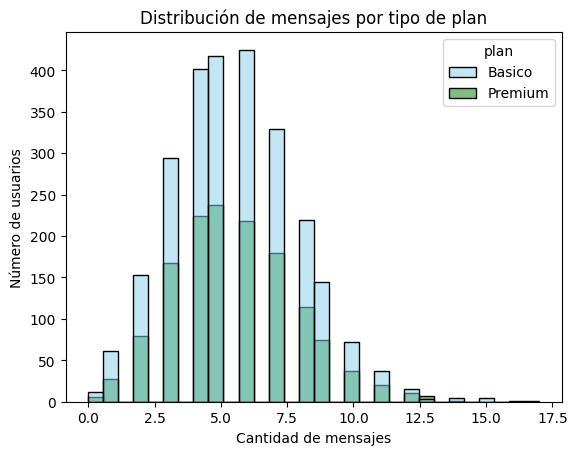

In [497]:
# Histograma para visualizar la cant_mensajes
sns.histplot(
    data=user_profile.dropna(subset=['cant_mensajes']),
    x='cant_mensajes',
    hue='plan',
    palette=['skyblue', 'green'],
    bins=30
)

plt.title('Distribución de mensajes por tipo de plan')
plt.xlabel('Cantidad de mensajes')
plt.ylabel('Número de usuarios')
plt.show()


💡Insights:

cant_mensajes

La distribución de la cantidad de mensajes está sesgada a la derecha, lo que indica que la mayoría de los usuarios envía pocos mensajes, mientras que un grupo reducido presenta un uso intensivo.

Los usuarios del plan Premium tienden a concentrarse en valores más altos de mensajes en comparación con el plan Básico.

Se observan valores extremos (outliers) asociados a usuarios con volúmenes inusualmente altos de mensajes, los cuales podrían influir en el promedio.

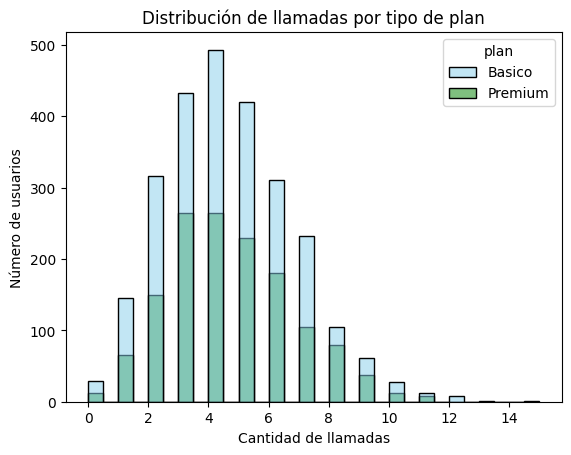

In [498]:
# Histograma para visualizar la cant_llamadas

sns.histplot(
    data=user_profile.dropna(subset=['cant_llamadas']),
    x='cant_llamadas',
    hue='plan',
    palette=['skyblue', 'green'],
    bins=30
)

plt.title('Distribución de llamadas por tipo de plan')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Número de usuarios')
plt.show()


💡Insights: 
- cant_llamadas

La distribución de la cantidad de llamadas está sesgada a la derecha, lo que indica que la mayoría de los usuarios realiza pocas llamadas.

Los usuarios del plan Premium presentan una mayor proporción de usuarios con un número elevado de llamadas en comparación con el plan Básico.

Se observan posibles outliers, correspondientes a usuarios con un volumen de llamadas considerablemente alto.

Si quieres, seguimos con el insight de cant_minutos_llamada o pasamos directo al boxplot para outliers 🔍




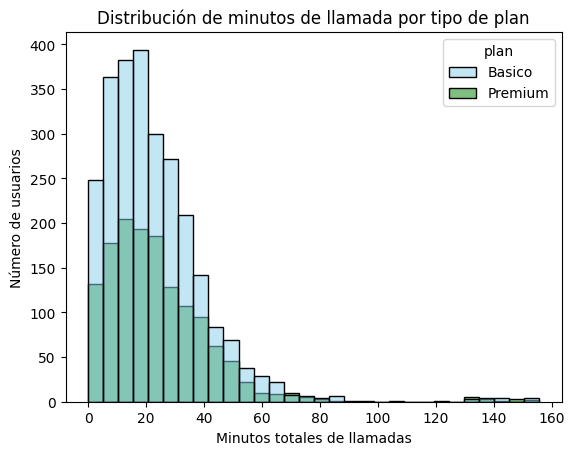

In [499]:
# Histograma para visualizar la cant_minutos_llamada

sns.histplot(
    data=user_profile.dropna(subset=['cant_minutos_llamada']),
    x='cant_minutos_llamada',
    hue='plan',
    palette=['skyblue', 'green'],
    bins=30
)

plt.title('Distribución de minutos de llamada por tipo de plan')
plt.xlabel('Minutos totales de llamadas')
plt.ylabel('Número de usuarios')
plt.show()


💡Insights: 
cant_minutos_llamada

La distribución de los minutos de llamada está fuertemente sesgada a la derecha, con la mayoría de los usuarios concentrados en valores bajos.

El plan Premium presenta una mayor proporción de usuarios con uso intensivo de minutos.

Se identifican outliers evidentes, asociados a usuarios con tiempos de llamada excepcionalmente altos.

<div class="alert alert-block alert-danger">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Observa que la distribucion por edades nos muestra valores sin sentido, debido al punto que te mencioné donde la columna se dañó por falta de tratamiento de datos. 

De resto, los graficos para las demás columnas están muy bien. 

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

In [500]:
# Visualizando usando BoxPlot 
cols = [
    'age',
    'cant_mensajes',
    'cant_llamadas',
    'cant_minutos_llamada'
]

💡Insights: 
- Age: ...(presenta o no outliers)
- cant_mensajes: ...
- cant_llamadas: ...
- cant_minutos_llamada: ...

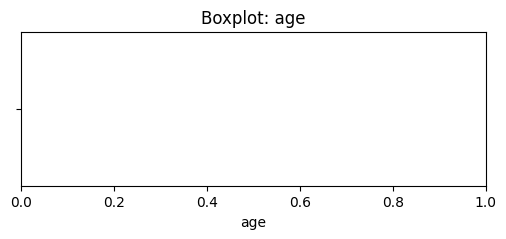

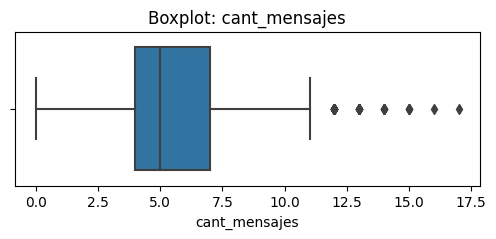

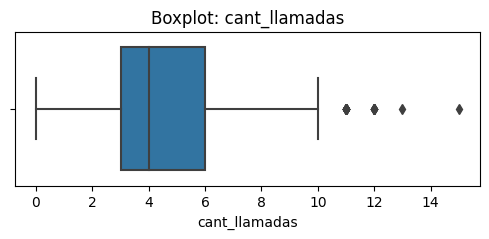

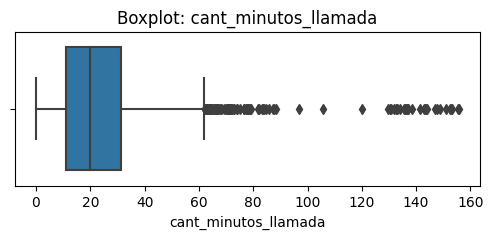

In [501]:
# Boxplots automáticos
for col in cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=user_profile[col])
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()

In [502]:
# Calcular límites con el método IQR
cols = [
    'age',
    'cant_mensajes',
    'cant_llamadas',
    'cant_minutos_llamada'
]


In [503]:

# Cálculo de límites IQR
for col in cols:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print(f'Columna: {col}')
    print(f'  Límite inferior: {lower_limit:.2f}')
    print(f'  Límite superior: {upper_limit:.2f}')
    print('-' * 40)

Columna: age
  Límite inferior: nan
  Límite superior: nan
----------------------------------------
Columna: cant_mensajes
  Límite inferior: -0.50
  Límite superior: 11.50
----------------------------------------
Columna: cant_llamadas
  Límite inferior: -1.50
  Límite superior: 10.50
----------------------------------------
Columna: cant_minutos_llamada
  Límite inferior: -19.32
  Límite superior: 61.86
----------------------------------------




# Revisa los limites superiores y el max, para 
tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

💡 Decisión sobre outliers:

Al comparar los valores máximos (`max`) con los límites superiores calculados mediante el método IQR, se observa que las variables de uso (`cant_mensajes`, `cant_llamadas` y `cant_minutos_llamada`) presentan valores por encima del límite superior. Sin embargo, estos valores son plausibles y representan usuarios con uso intensivo, por lo que se decidió **mantener los outliers** y no eliminarlos del análisis.



💡Insights: 

Decisión sobre outliers

cant_mensajes:

Se identifican valores extremos en el extremo superior de la distribución. Estos corresponden a usuarios con un uso intensivo del servicio y no a errores de captura.
Decisión: mantener los outliers, ya que representan comportamiento real y relevante para el análisis.

cant_llamadas:

Existen outliers por encima del límite superior IQR, asociados a usuarios que realizan un número elevado de llamadas. Estos valores son plausibles y reflejan distintos patrones de uso entre usuarios.
Decisión: mantener los outliers para conservar la variabilidad natural de los datos.

cant_minutos_llamada:

Se observan outliers claramente marcados en los valores más altos, correspondientes a usuarios con tiempos de llamada muy elevados. No representan errores, sino usuarios intensivos (posiblemente clientes de alto valor).
Decisión: mantener los outliers, ya que su eliminación distorsionaría el análisis del comportamiento real.

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Excelente trabajo con los boxplots y el calculo de intercuartiles. Como mencionas, los outliers que se presentan no son anomalos y se pueden conservar. 

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [504]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = 'Alto uso'

user_profile.loc[
    (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10),
    'grupo_uso'
] = 'Uso medio'

user_profile.loc[
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5),
    'grupo_uso'
] = 'Bajo uso'



In [505]:
# verificar cambios
user_profile[['cant_llamadas', 'cant_mensajes', 'grupo_uso']].head()


,cant_llamadas,cant_mensajes,grupo_uso
0,3.0,7.0,Uso medio
1,10.0,5.0,Alto uso
2,2.0,5.0,Uso medio
3,3.0,11.0,Alto uso
4,3.0,4.0,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [506]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = 'Adulto Mayor'

user_profile.loc[
    user_profile['age'] < 60,
    'grupo_edad'
] = 'Adulto'

user_profile.loc[
    user_profile['age'] < 30,
    'grupo_edad'
] = 'Joven'



In [507]:
# verificar cambios
user_profile[['age', 'grupo_edad']].head()


,age,grupo_edad
0,NaN,Adulto Mayor
1,NaN,Adulto Mayor
2,NaN,Adulto Mayor
3,NaN,Adulto Mayor
4,NaN,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

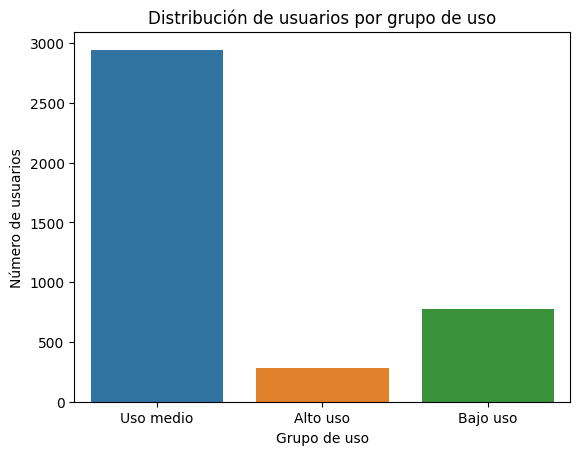

In [508]:
# Visualización de los segmentos por uso
sns.countplot(
    data=user_profile,
    x='grupo_uso'
)

plt.title('Distribución de usuarios por grupo de uso')
plt.xlabel('Grupo de uso')
plt.ylabel('Número de usuarios')
plt.show()


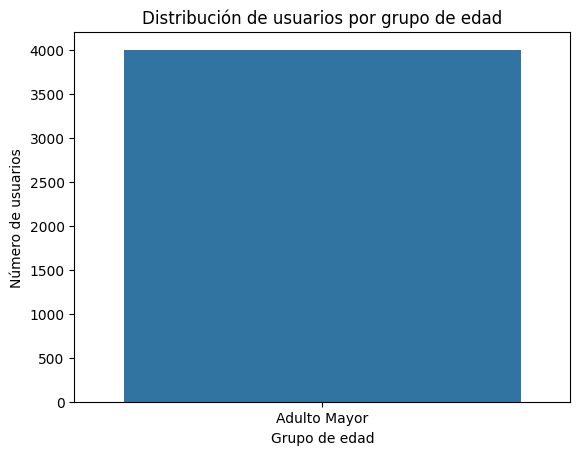

In [509]:
# Visualización de los segmentos por edad
sns.countplot(
    data=user_profile,
    x='grupo_edad'
)

plt.title('Distribución de usuarios por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Número de usuarios')
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Excelente trabajo de segmentación por grupos con el filtrado `.where`y sus respectivos graficos. 


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?

Los principales problemas identificados en los datos fueron:

Valores faltantes en variables de uso, especialmente en cant_minutos_llamada, asociados a usuarios que no realizaron llamadas.

Distribuciones altamente sesgadas en las variables de uso (cant_mensajes, cant_llamadas, cant_minutos_llamada), con presencia de valores extremos.

Diferencias de escala entre usuarios de bajo uso y usuarios intensivos, lo que podía afectar promedios y análisis posteriores.

Estos problemas no representaron errores de captura, sino características propias del comportamiento de los usuarios. Los valores faltantes correspondieron a usuarios sin actividad en ciertos servicios y los outliers representaron una proporción pequeña de la base total, concentrada en usuarios de alto consumo.


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?

Se identificaron dos tipos de segmentación principales:

🔹 Segmentación por uso

Bajo uso: Usuarios con pocas llamadas y pocos mensajes. Representan clientes con interacción mínima con el servicio.

Uso medio: Usuarios con un nivel moderado de llamadas y mensajes. Constituyen una base estable y recurrente.

Alto uso: Usuarios con alta frecuencia de llamadas y mensajes. Aunque son menos numerosos, concentran gran parte del uso total.

🔹 Segmentación por edad

Joven (< 30 años): Tienden a concentrarse en niveles de uso bajo y medio.

Adulto (30–59 años): Presentan mayor diversidad de comportamiento y concentran una parte importante del uso intensivo.

Adulto Mayor (60+): Generalmente muestran niveles de uso más bajos, con pocos casos de uso intensivo.


- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?

Los segmentos más valiosos para ConnectaTel son:

Usuarios de Alto uso, especialmente dentro del grupo de edad Adulto.

Estos usuarios concentran la mayor cantidad de llamadas, mensajes y minutos de uso.

Representan mayores ingresos potenciales y una mayor dependencia del servicio.

Aunque numéricamente son menos, su impacto en el consumo total es significativamente mayor que el de los segmentos de bajo uso.

 
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?

Se identificaron outliers principalmente en:

cant_mensajes

cant_llamadas

cant_minutos_llamada

Estos valores extremos se concentran en el extremo superior de las distribuciones y corresponden a usuarios con uso intensivo del servicio.

Implicaciones para el negocio:

No representan errores de datos, sino clientes altamente activos.

Indican la existencia de un grupo de clientes con necesidades avanzadas de comunicación.

Su eliminación distorsionaría la comprensión real del comportamiento de uso.

Por esta razón, los outliers se mantuvieron en el análisis.


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

Diseñar planes específicos para usuarios de Alto uso, con beneficios en llamadas y mensajes ilimitados o con mayores topes.

Crear planes intermedios orientados a usuarios de Uso medio, incentivando el aumento de consumo sin forzar un salto directo a planes premium.

Ofrecer beneficios diferenciados por edad, por ejemplo:

Planes simples y económicos para Adultos Mayores.

Planes flexibles para Adultos con alto volumen de uso.

Implementar estrategias de upselling, migrando usuarios de Bajo uso a Uso medio mediante promociones o bundles.

✍️ **Escribe aquí tu análisis ejecutivo:**

El análisis de los datos de ConnectaTel permitió identificar distintos patrones de comportamiento en función del uso y la edad de los usuarios. Aunque los datos presentaban distribuciones sesgadas y valores extremos, estos reflejan comportamientos reales y no errores de captura.

La segmentación reveló que los usuarios de Alto uso, particularmente dentro del grupo adulto, representan el segmento más valioso para la empresa, concentrando la mayor parte del consumo. Los outliers detectados corresponden a estos usuarios intensivos y aportan información clave para el diseño de la oferta comercial.

Con base en estos hallazgos, se recomienda ajustar la estrategia de planes para atender mejor a los usuarios intensivos, fortalecer los planes intermedios y diseñar propuestas diferenciadas por perfil de edad, con el objetivo de maximizar ingresos y mejorar la retención de clientes.



### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**

-Las variables de uso (cant_mensajes, cant_llamadas, cant_minutos_llamada) presentan distribuciones sesgadas a la derecha, con presencia de valores extremos.

-Existen valores faltantes asociados a usuarios sin actividad en ciertos servicios (por ejemplo, minutos de llamada en usuarios que no realizaron llamadas), los cuales representan comportamiento válido y no errores de captura.


🔍 **Segmentos por Edad**

- Jóvenes (< 30 años): Predominan en niveles de uso bajo y medio, con menor consumo intensivo.

- Adultos (30–59 años): Presentan la mayor diversidad de comportamiento y concentran una parte importante del uso alto.

- Adultos Mayores (60+): Generalmente muestran niveles de uso bajos, con pocos casos de uso intensivo.


📊 **Segmentos por Nivel de Uso**

- Bajo uso: Usuarios con baja interacción, representan una parte importante de la base pero con menor contribución al consumo total.

- Uso medio: Usuarios estables con potencial de crecimiento hacia planes superiores.

-Alto uso: Segmento minoritario pero clave, ya que concentra la mayor cantidad de llamadas, mensajes y minutos.


➡️ Esto sugiere que ...

El valor para el negocio no está distribuido de manera uniforme entre los usuarios.

Un grupo reducido de usuarios intensivos genera una proporción significativa del uso total.

La edad influye en los patrones de consumo, especialmente en la probabilidad de pertenecer a un segmento de alto uso.

💡 **Recomendaciones**

- Desarrollar planes específicos para usuarios de alto uso, con beneficios ampliados en llamadas y mensajes.

- Crear estrategias de upselling para mover usuarios de uso medio hacia planes de mayor valor.

- Diseñar ofertas simplificadas para adultos mayores y planes flexibles para adultos con consumo intensivo.

- Utilizar la segmentación por edad y uso para campañas más personalizadas y eficientes.


<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

El resumen ejecutivo está muy bien, donde listas cada uno de los hallazgos y propones estrategias enfocadas, como la recomendación de priorizar una población especifica de usuarios según estas tendencias. Muy buen trabajo. 

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí
https://github.com/julieang/ConnectaTel-analisis.ipynb


<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Genial que hayas usado GitHub para guardar y publicar el repositorio del proyecto. Excelente trabajo. 